## U19 Motif analysis for DA peaks across tissues

Comparisons on major cell types

In [ ]:
library(ArchR)
library(dplyr)
library(BSgenome.Hsapiens.UCSC.hg38)
set.seed(1)
options(repr.plot.width=12, repr.plot.height=8)
source("~/projects/lung_immune_fine_mapping/code/helper_functions.r")
addArchRThreads(threads = 8) 
addArchRGenome("hg38")
work.dir<-"/home/jinggu/cluster/projects/u19_multiomics"

In [ ]:
proj<-loadArchRProject("all_sample_DA_cross_tissues")
proj@peakSet

In [10]:
GoM_topDE_gene_list <- readRDS("~/projects/lung_lymph_scMultiomics/output/fastTopics/GoM_topDE_gene_list.RDS")

topDE_cross_tissue<-readRDS("~/projects/lung_immune_fine_mapping/analysis/notebooks/u19_multiomics/analyses/all_sample_DA_cross_tissues/DA_cross_tissue_merged.rds")

In [163]:
annotate_peaks<-function(markerTest, test_genes, window_size=500){
    # make GRanges for topic-specific genes and look for peaks within 500bp from genes
    gr<-proj@geneAnnotation$genes[proj@geneAnnotation$genes$symbol %in% test_genes,]
    start(gr)<-start(gr)-window_size
    end(gr)<-end(gr)+window_size

    nearGoM<-data.frame(overlapsAny(proj@peakSet, gr))
    colnames(nearGoM)<-"nearGoM"
    markerTest@assays@data$nearGoM<-nearGoM
    return(markerTest)
}


### TF enrichment test on genes specific to topic 5 

In [166]:
markerTest<-topDE_cross_tissue$T_cells
topDE_genenames<-rownames(GoM_topDE_gene_list[[5]] %>% filter(z>0))
markerTest<-annotate_peaks(markerTest, topDE_genenames)

motifs_enrich <- peakAnnoEnrichment(
    seMarker = markerTest,
    ArchRProj = proj,
    peakAnnotation = "Motif",
    cutOff = "nearGoM==TRUE & FDR<=0.1 & Log2FC>=0.5"
  )

ArchR logging to : ArchRLogs/ArchR-peakAnnoEnrichment-253438f342f4-Date-2024-05-22_Time-15-13-32.log
If there is an issue, please report to github with logFile!

2024-05-22 15:13:36 : Computing Enrichments 1 of 1, 0.075 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-peakAnnoEnrichment-253438f342f4-Date-2024-05-22_Time-15-13-32.log



Warning message:
“ggrepel: 36 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


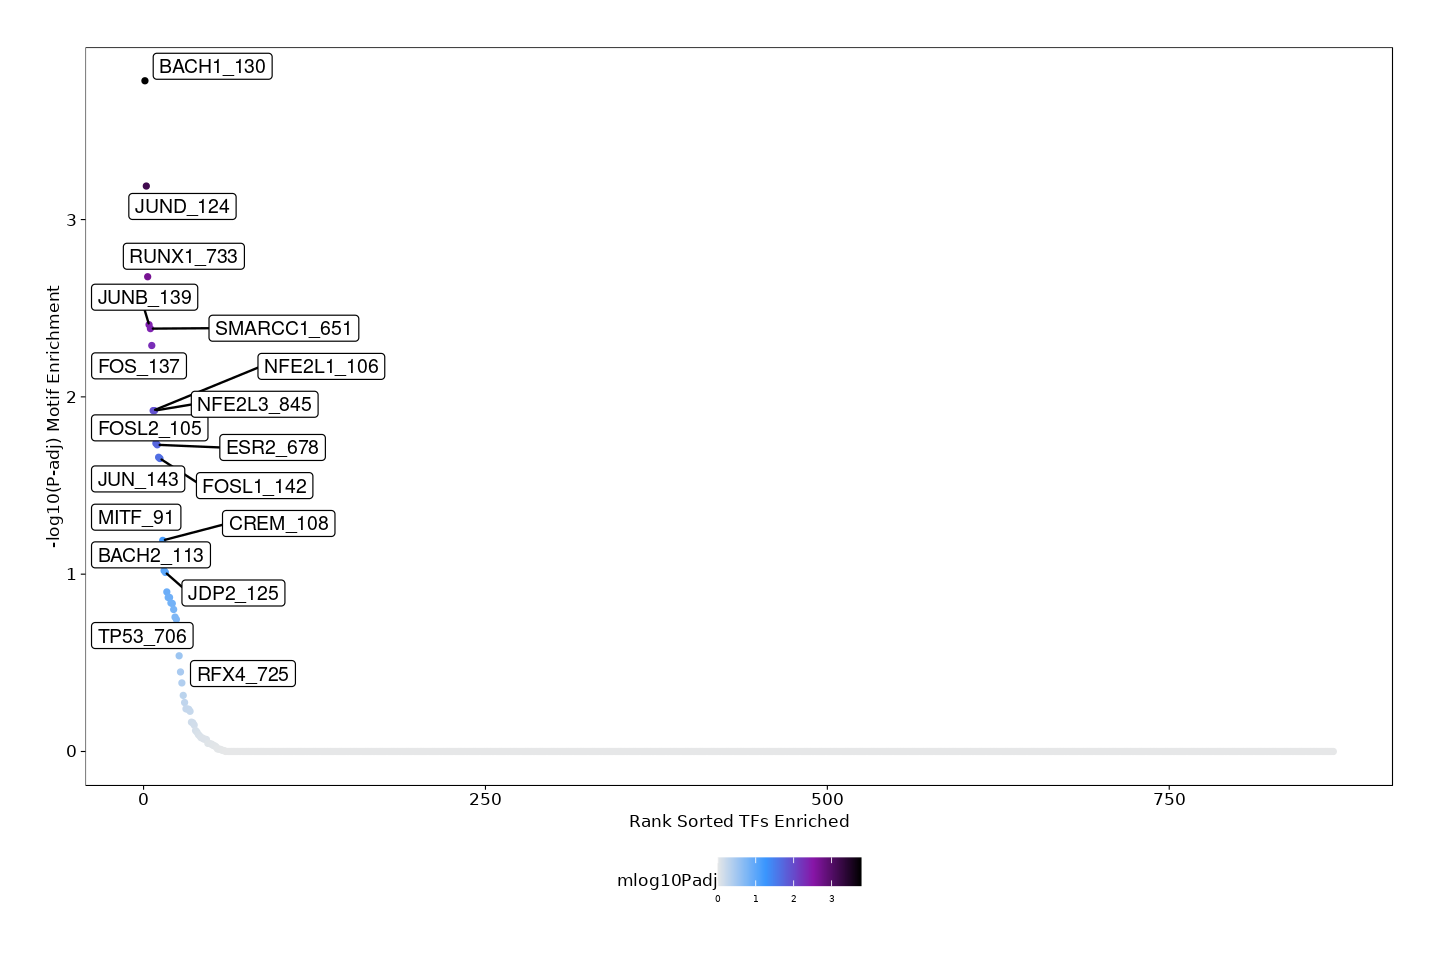

In [167]:
plot_ranked_motifs(motifs_enrich, "lungs_T_cells")

### TF enrichment test on genes specific to topic 4 

ArchR logging to : ArchRLogs/ArchR-peakAnnoEnrichment-25344bddf304-Date-2024-05-22_Time-15-13-20.log
If there is an issue, please report to github with logFile!

2024-05-22 15:13:25 : Computing Enrichments 1 of 1, 0.073 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-peakAnnoEnrichment-25344bddf304-Date-2024-05-22_Time-15-13-20.log

Warning message:
“ggrepel: 28 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


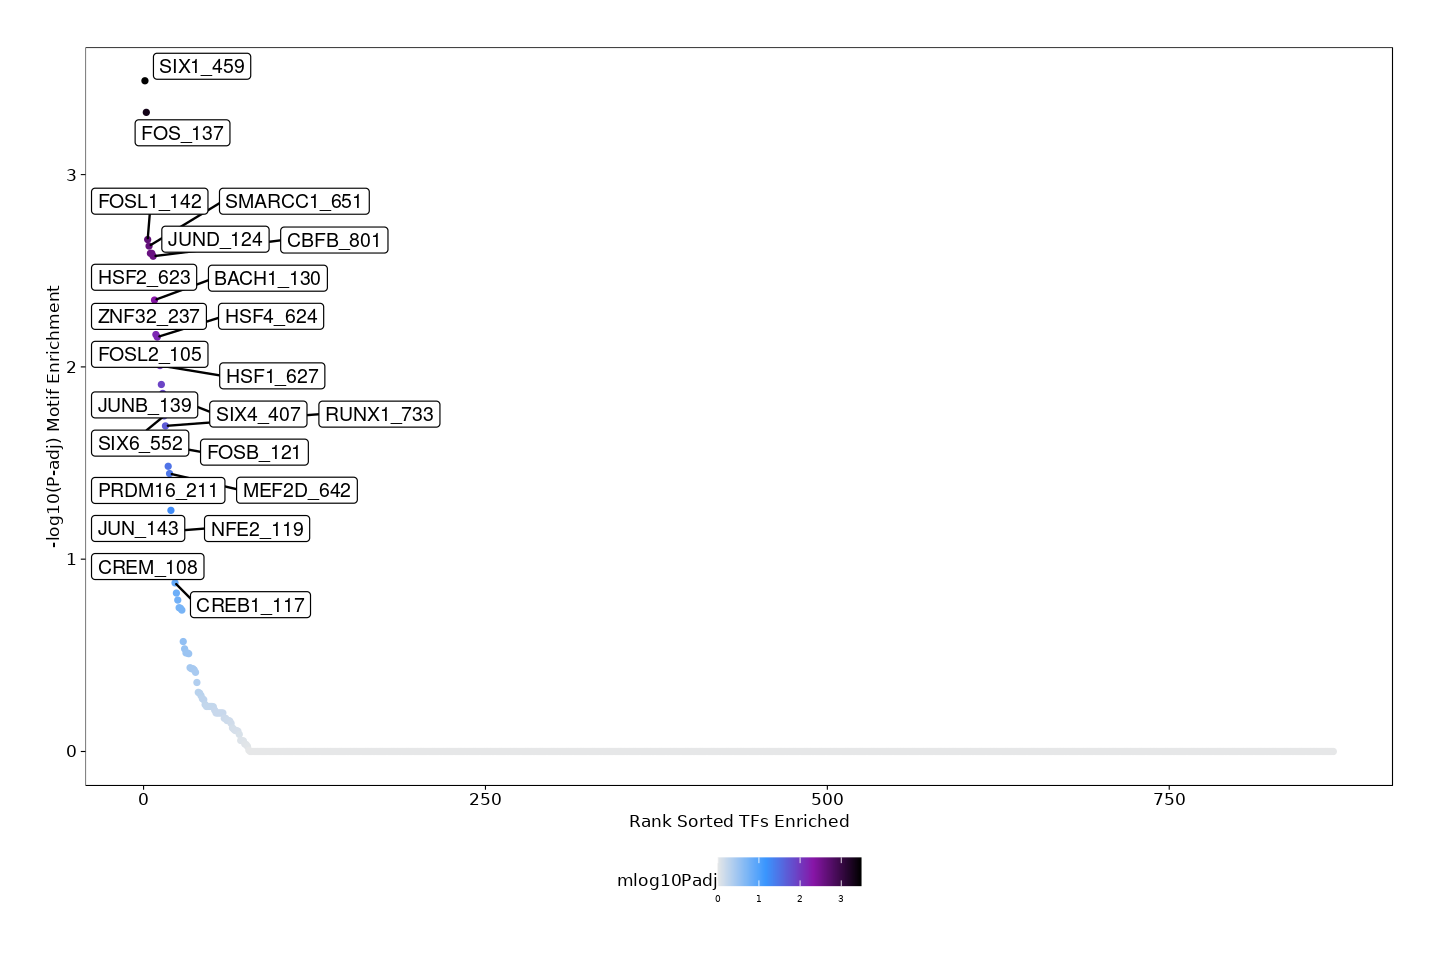

In [164]:
markerTest<-topDE_cross_tissue$T_cells
topDE_genenames<-rownames(GoM_topDE_gene_list[[4]] %>% filter(z>0))
markerTest<-annotate_peaks(markerTest, topDE_genenames)

motifs_enrich <- peakAnnoEnrichment(
    seMarker = markerTest,
    ArchRProj = proj,
    peakAnnotation = "Motif",
    cutOff = "nearGoM==TRUE & FDR<=0.1 & Log2FC>=0.5"
  )
plot_ranked_motifs(motifs_enrich, "lungs_T_cells")

### TF enrichment test on genes specific to topic10/topic11 

ArchR logging to : ArchRLogs/ArchR-peakAnnoEnrichment-2534e2a20a3-Date-2024-05-22_Time-15-20-07.log
If there is an issue, please report to github with logFile!

2024-05-22 15:20:12 : Computing Enrichments 1 of 1, 0.076 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-peakAnnoEnrichment-2534e2a20a3-Date-2024-05-22_Time-15-20-07.log

Warning message:
“ggrepel: 37 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


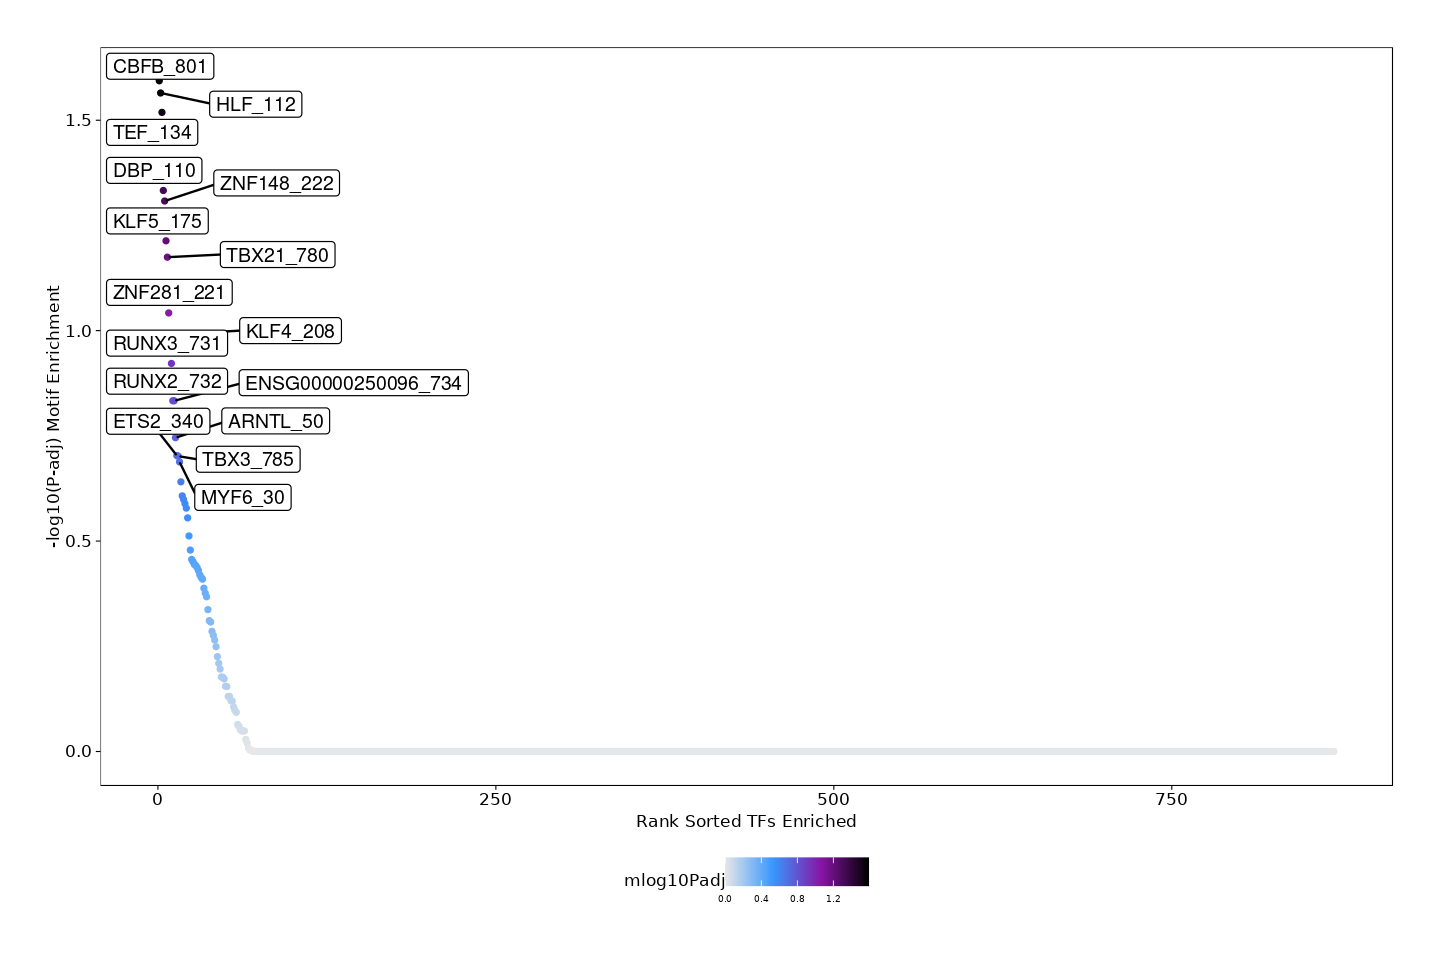

In [176]:
markerTest<-topDE_cross_tissue$Memory_B_cells
topDE_genenames<-rownames(GoM_topDE_gene_list[[11]] %>% filter(z>0))
markerTest<-annotate_peaks(markerTest, topDE_genenames)

motifs_enrich <- peakAnnoEnrichment(
    seMarker = markerTest,
    ArchRProj = proj,
    peakAnnotation = "Motif",
    #background="bgdPeaks",
    cutOff = "nearGoM==TRUE & FDR<=0.1 & Log2FC>=0.5"
  )
plot_ranked_motifs(motifs_enrich, "lungs_Memory_B_cells")

ArchR logging to : ArchRLogs/ArchR-peakAnnoEnrichment-2534720ba990-Date-2024-05-22_Time-15-18-20.log
If there is an issue, please report to github with logFile!

2024-05-22 15:18:24 : Computing Enrichments 1 of 1, 0.071 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-peakAnnoEnrichment-2534720ba990-Date-2024-05-22_Time-15-18-20.log

Warning message:
“ggrepel: 45 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


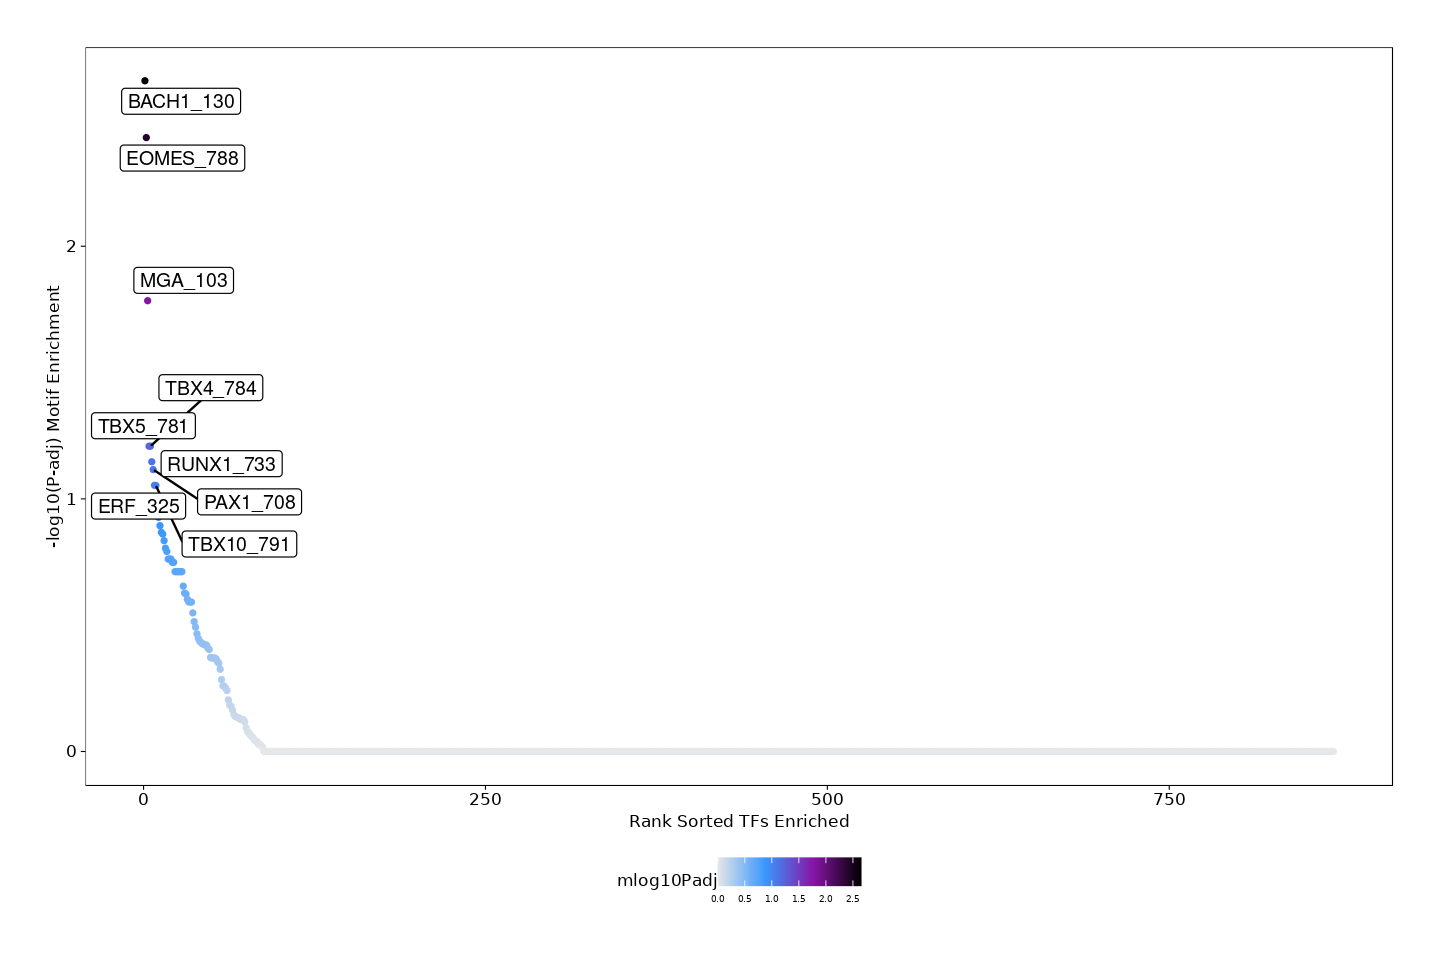

In [174]:
markerTest<-topDE_cross_tissue$Memory_B_cells
topDE_genenames<-rownames(GoM_topDE_gene_list[[10]] %>% filter(z>0))
markerTest<-annotate_peaks(markerTest, topDE_genenames)

motifs_enrich <- peakAnnoEnrichment(
    seMarker = markerTest,
    ArchRProj = proj,
    peakAnnotation = "Motif",
    cutOff = "nearGoM==TRUE & FDR<=0.1 & Log2FC>=0.5"
  )
plot_ranked_motifs(motifs_enrich, "lungs_Memory_B_cells")

ArchR logging to : ArchRLogs/ArchR-peakAnnoEnrichment-2534482612d-Date-2024-05-22_Time-15-15-10.log
If there is an issue, please report to github with logFile!

2024-05-22 15:15:14 : Computing Enrichments 1 of 1, 0.073 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-peakAnnoEnrichment-2534482612d-Date-2024-05-22_Time-15-15-10.log

Warning message:
“ggrepel: 39 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


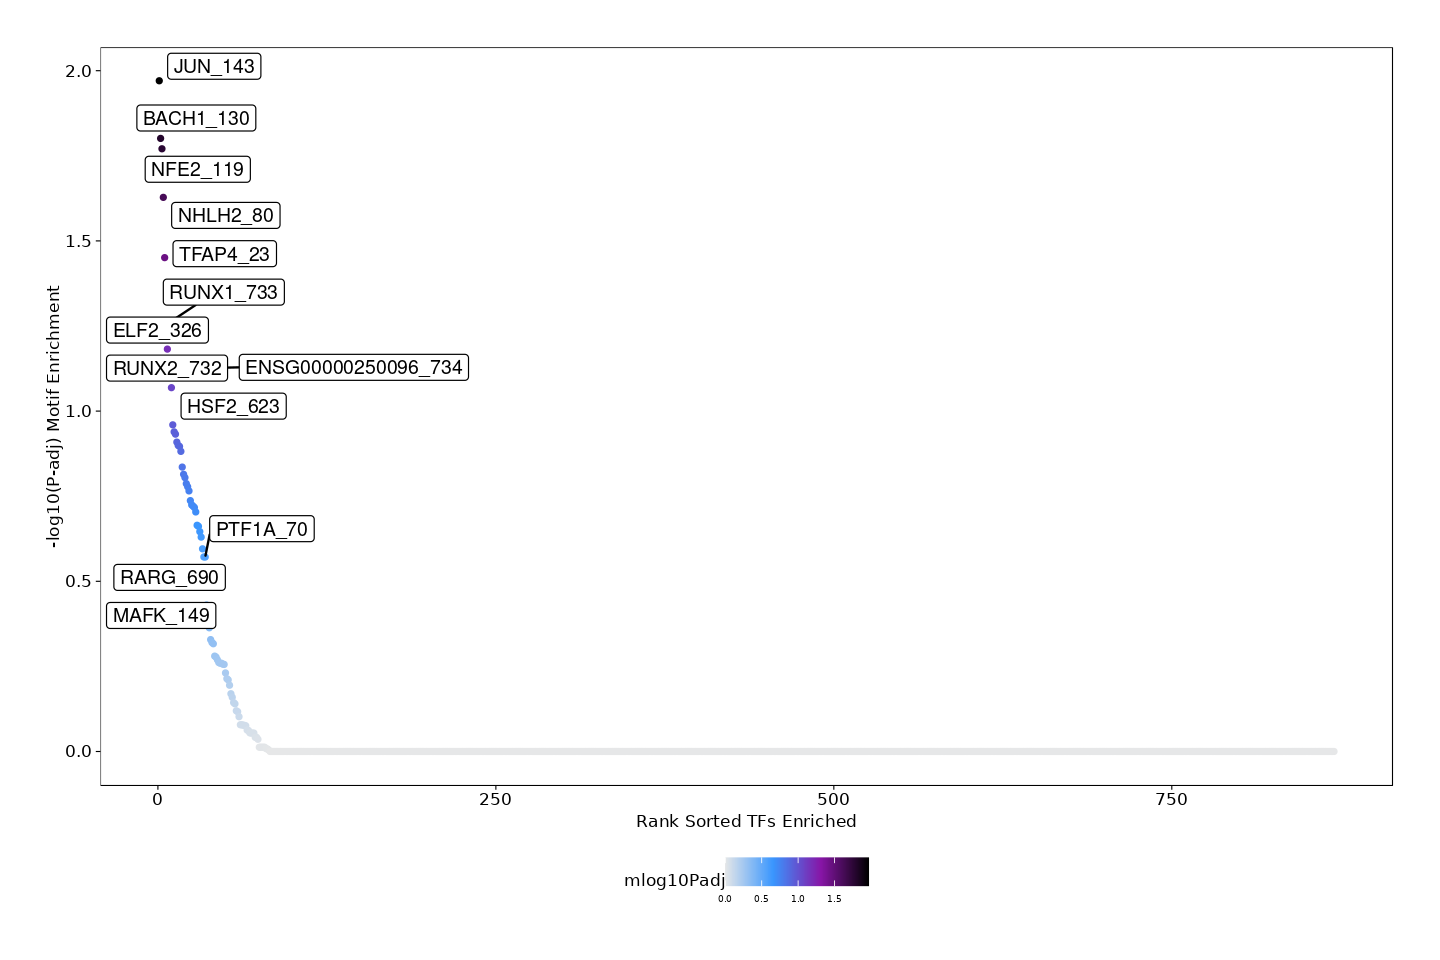

In [170]:
markerTest<-topDE_cross_tissue$Memory_B_cells
topDE_genenames<-rownames(GoM_topDE_gene_list[[12]] %>% filter(z>0))
markerTest<-annotate_peaks(markerTest, topDE_genenames)

motifs_enrich <- peakAnnoEnrichment(
    seMarker = markerTest,
    ArchRProj = proj,
    peakAnnotation = "Motif",
    cutOff = "nearGoM==TRUE & FDR<=0.1 & Log2FC>=0.5"
  )
plot_ranked_motifs(motifs_enrich, "lungs_Memory_B_cells")